<a href="https://colab.research.google.com/github/B-Jahnavi/Heart-Attack_Prediction/blob/main/HeartAttack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Gerekli kütüphanelerin tanımlanması
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, normalize
from matplotlib import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import seaborn as sn

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Heart.csv to Heart.csv


In [3]:
heart_data = pd.read_csv ('Heart.csv')

In [4]:
heart_data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
X=heart_data.drop('ChestPain',axis=1) 
y=heart_data['ChestPain']

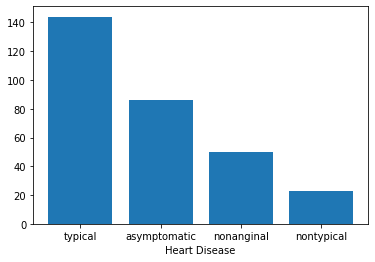

In [8]:
star_clas = y.unique()
values = y.value_counts()

plt.bar(star_clas, values)
plt.xlabel("Heart Disease" )
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [10]:
X

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,0,29,1,31,64,1,2,49,0,22,2,0,0,0
1,1,33,1,40,111,0,2,10,1,15,1,3,1,1
2,2,33,1,14,60,0,2,29,1,25,1,2,2,1
3,3,3,1,22,80,0,0,84,0,32,2,0,1,0
4,4,7,0,22,35,0,2,71,0,14,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,11,1,8,93,0,0,32,0,12,1,0,2,1
299,299,34,1,30,26,1,0,40,0,31,1,2,2,1
300,300,23,1,22,1,0,0,16,1,12,1,1,2,1
301,301,23,0,22,67,0,2,73,0,0,1,1,1,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)


In [12]:
scaler.data_max_


array([302.,  40.,   1.,  49., 151.,   1.,   2.,  90.,   1.,  39.,   2.,
         4.,   3.,   1.])

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
Y=enc.fit_transform(y[:,np.newaxis]).toarray()

In [14]:
Y

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [15]:
X.shape


(303, 14)

In [16]:
n_feat = X.shape[1]
n_class= Y.shape[1]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.30)
X_test, X_val, y_test,y_val = train_test_split(X_test, y_test, test_size = 0.40)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(212, 14)
(54, 14)
(37, 14)


In [19]:
def x_model(name, hidden_l,op):
  model = Sequential(name = name )
  model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
  for a in range(hidden_l):
    model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(n_class, kernel_initializer = 'uniform', activation = 'softmax'))
  model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [20]:
n_class

4

In [21]:
def run(name,hidden_l,op):
    batch_s=12
    epochs=100
    model=x_model(name,hidden_l,op)
    t_history = model.fit(X_train, y_train, batch_size=batch_s, epochs=epochs, verbose=0, validation_data=(X_val, y_val))
    
    return t_history , model

In [22]:
def plt_history(history,model_name):
    fig, (cx1, cx2) = plt.subplots(2, figsize=(8, 6))

    cx1.plot(history.history['loss'])
    cx1.plot(history.history['val_loss'])


    cx2.plot(history.history['accuracy'])
    cx2.plot(history.history['val_accuracy'])

    
    cx1.set_ylabel('loss')
    cx1.legend(['train', 'test'], loc='upper left')

    cx2.set_ylabel('accuracy')
    cx2.set_xlabel('epoch')
    cx1.legend(['Training', 'Validation'], loc='upper left')
    plt.savefig(model_name+'_los_acc')


In [23]:
Y_test = np.argmax(y_test, axis=1)


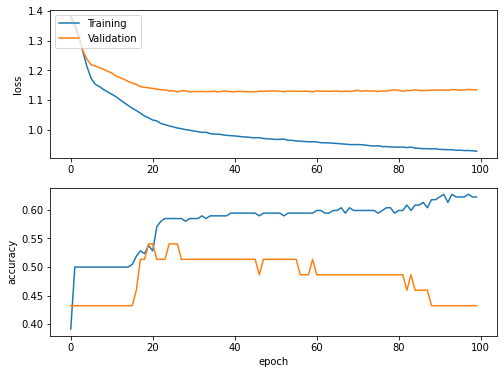

In [24]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [25]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

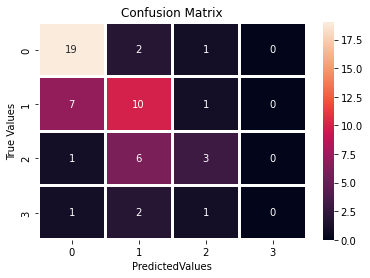

In [26]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

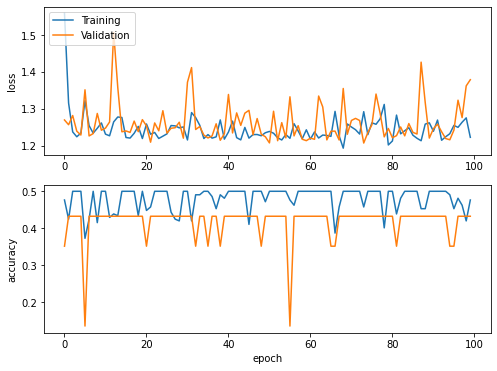

In [33]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.5)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [34]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

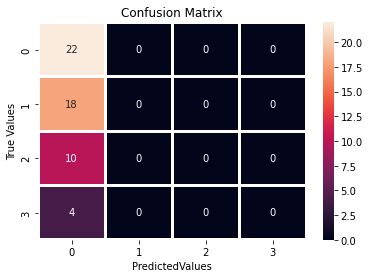

In [35]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

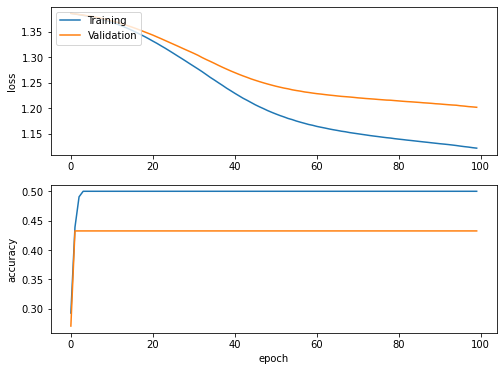

In [37]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)


In [38]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

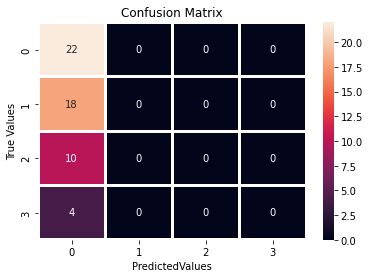

In [39]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

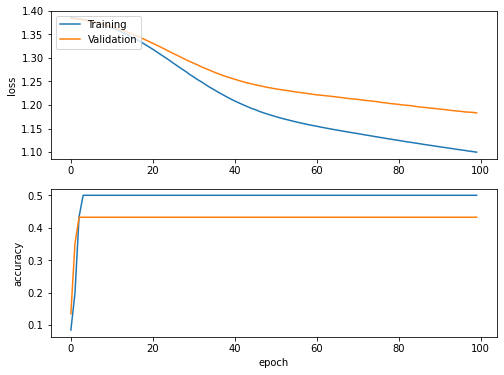

In [40]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=0

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [41]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

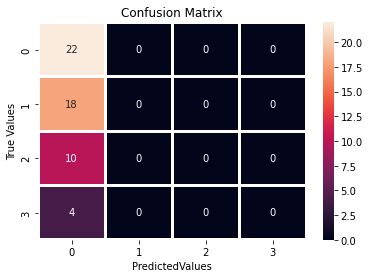

In [42]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

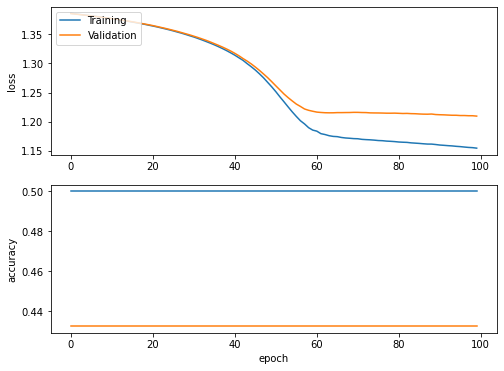

In [44]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=7


history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [45]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

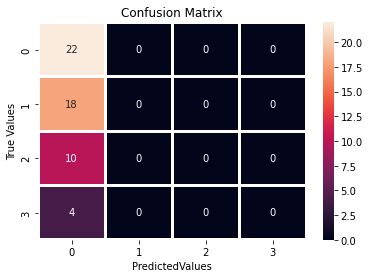

In [46]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()

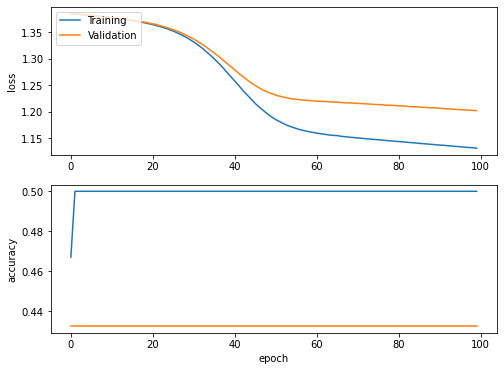

In [47]:
name='model1'
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
hidden_l=3

history,model = run(name,hidden_l,op) 
plt_history(history,model.name)

In [48]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

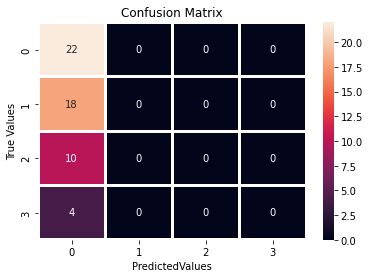

In [49]:
cm =confusion_matrix(Y_test, y_pred)
sn.heatmap(cm,annot=True,fmt='g',lw=2)
plt.ylabel("True Values")
plt.xlabel("PredictedValues")
plt.title("Confusion Matrix")

plt.show()